In [1]:
#Importing necessary libraries 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
#Loading the data 
companies = pd.read_csv('1000_Companies.csv')

In [3]:
#Selecting features and target 
X = companies.iloc[:, :-1].values 
y = companies.iloc[:, 4].values

In [4]:
#Understanding the dataset 
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#Initialising label encoder 
le = LabelEncoder()

In [6]:
#Labeling the state column 
X[:, 3] = le.fit_transform(X[:, 3])

In [7]:
#One Hot Encoding for State column (for multicollinearity removal)
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder='passthrough')

In [8]:
#Transforming the features 
X = ct.fit_transform(X)
print(X[0])

[0.0 0.0 1.0 165349.2 136897.8 471784.1]


In [9]:
#Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
#Train the linear regression model 
regressor = LinearRegression()

In [11]:
regressor.fit(X,y)

LinearRegression()

In [14]:
def predict_profit(): 
    randd_spend = float(input("Enter the spending amount for R&D"))
    administration = float(input("Enter the administration cost"))
    marketing_speed = float(input("Enter the spending amount for marketing spend"))
    state = input("Enter the state")

    # Prepare the input for prediction (state needs to be one-hot encoded)                    
    state_encoded = le.transform([state])[0]

    # Prepare the input for prediction (state needs to be one-hot encoded)
    state_one_hot = np.zeros(len(le.classes_))
    state_one_hot[state_encoded] = 1

    #Combine the input into single feature array 
    user_input = np.array([randd_spend, administration, marketing_speed])
    user_input = np.concatenate([state_one_hot, user_input])

    #Predict the profit using the trained model 
    predicted_profit = regressor.predict([user_input])
    print(f"The predicted profit for the given inputs is: {predicted_profit[0]:.2f}")

predict_profit()
                    

Enter the spending amount for R&D 165349.20
Enter the administration cost 101145.55	
Enter the spending amount for marketing spend 471784.10
Enter the state Florida


The predicted profit for the given inputs is: 163020.64


In [15]:
#Getting accuracy
accuracy = regressor.score(X_test, y_test)
print(accuracy)

0.988776225540366


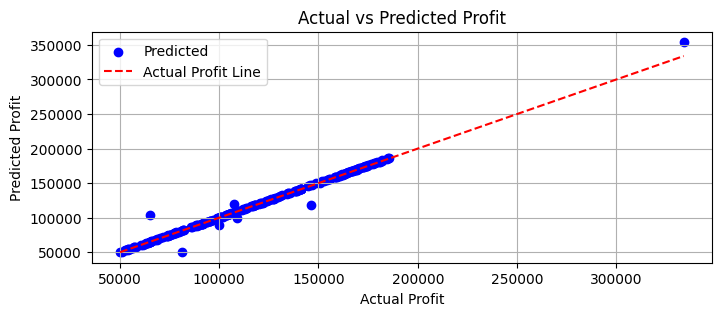

In [16]:
#Plotting it
import matplotlib.pyplot as plt 
y_predict = regressor.predict(X_test)
plt.figure(figsize = (8,3))
plt.scatter(y_test, y_predict, color = 'blue', label = 'Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Profit Line')
plt.title('Actual vs Predicted Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()